# Tutorial for using the Crowd Counting APIs

Start by importing the crowdcunting package and other packages.

In [1]:
import os
import sys
from crowdcounting import CrowdCountModelPose, CrowdCountModelMCNN, Router
import urllib
import base64
import io
from PIL import Image
from matplotlib.pyplot import imshow
import numpy as np
%matplotlib inline

/Users/anthon/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/anthon/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/anthon/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/anthon/opt/anaconda3/lib/python3.7/site-packages/tensorflow/

Let's look at the example image, courtesy of Satria Perkasa on Unsplash. 

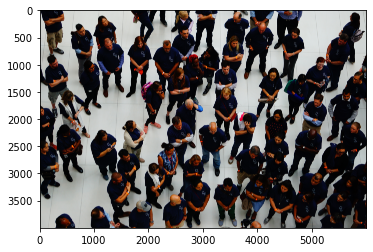

In [2]:
img = '../data/images/2.jpg'
pil_im = Image.open(img)
imshow(np.asarray(pil_im))

Here we load the model and make predictions. By default, we used the CrowdCountModlePose() function which uses OpenPose model as implemented by [this GitHub repo](https://github.com/ildoonet/tf-pose-estimation). 

Another option is the CrowdCountModelMCNN() function which uses the MCNN model as implemented [here](https://github.com/svishwa/crowdcount-mcnn).

The last option is the Router() function is is a combination of the above two functions. Specifically, it uses the prediction from OpenPose unless both predictions from OpenPose and MCNN exceed predefined cutoff point. 

In [7]:
mcnn_model_path = '../data/models/mcnn_shtechA_660.h5'

gpu_id = 0
# model = CrowdCountModelPose(gpu_id)
model = CrowdCountModelMCNN(gpu_id, model_path=mcnn_model_path)
# model = Router(gpu_id, mcnn_model_path=mcnn_model_path, cutoff_pose=20, cutoff_mcnn=50)

with open(img, 'rb') as image:
    b = image.read()
    result = model.score(b, return_image=True, img_dim=1750)

pred = result["pred"]
scored_image = result["image"]

/Users/anthon/opt/anaconda3/lib/python3.7/site-packages/crowdcountmcnn/src/network.py:55: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  v = Variable(torch.from_numpy(x).type(dtype), requires_grad = False, volatile = True)


In [8]:
print(pred)

56


Here we convert the scored image into Pillow image format.

In [9]:
scored_image = urllib.parse.unquote(scored_image)
scored_image = base64.b64decode(scored_image)
scored_image = Image.open(io.BytesIO(scored_image))

In [7]:
one_dim = np.asarray(scored_image).flatten()
print(sum(one_dim)/255)

1112.894117647059


Finally we can show the scored image.

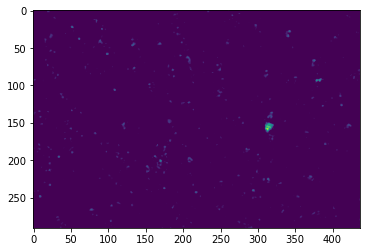

In [10]:
imshow(np.asarray(scored_image))

Feel free to try the other two models - CrowdCountModelMCNN and Router - and compare the results.
You can also set up a web service by using the code in the crowdcounting/demo folder.